In [ ]:
import cv2
import numpy as np
import string
import os
import matplotlib.pyplot as plt

In [ ]:
d={chr(i):i for i in range(255)}
c={i:chr(i) for i in range(255)}

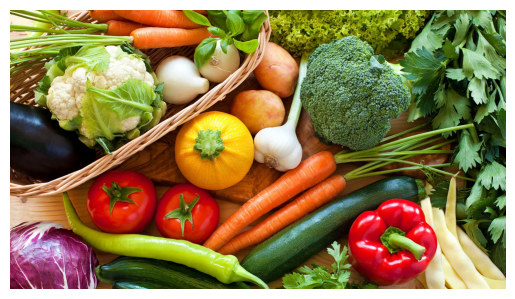

In [ ]:
image_path=r"/content/vegetables.jpg"
x=cv2.imread(image_path)
xrgb=cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
plt.imshow(xrgb)
plt.axis('off')
plt.show()

In [ ]:
x.shape

(1080, 1920, 3)

In [ ]:
key="123"
text="secret"

In [ ]:
key

'123'

In [ ]:
text_ascii=[d[ch] for ch in text]
key_ascii=[d[ch] for ch in key]
print(text_ascii)
print(key_ascii)

[115, 101, 99, 114, 101, 116]
[49, 50, 51]


In [ ]:
x_enc=x.copy()
n=0
m=0
z=0
l=len(text)
kl=0
for i in range(l):
  orig_val=x_enc[n,m,z]
  new_val=d[text[i]]^d[key[kl]]
  x_enc[n,m,z]=new_val
  print(f"Embedding '{text[i]}' (ASCII {d[text[i]]}) XOR '{key[kl]}' (ASCII{d[key[kl]]})={new_val} at pixel({n},{m},{z}) [original={orig_val}]")
  n=n+1
  m=m+1
  z=(z+1)%3
  m=(m+1)%3
  kl=(kl+1)%len(key)

Embedding 's' (ASCII 115) XOR '1' (ASCII49)=66 at pixel(0,0,0) [original=0]
Embedding 'e' (ASCII 101) XOR '2' (ASCII50)=87 at pixel(1,2,1) [original=114]
Embedding 'c' (ASCII 99) XOR '3' (ASCII51)=80 at pixel(2,1,2) [original=107]
Embedding 'r' (ASCII 114) XOR '1' (ASCII49)=67 at pixel(3,0,0) [original=55]
Embedding 'e' (ASCII 101) XOR '2' (ASCII50)=87 at pixel(4,2,1) [original=186]
Embedding 't' (ASCII 116) XOR '3' (ASCII51)=71 at pixel(5,1,2) [original=255]


In [ ]:
cv2.imwrite("encrypt.jpg",x_enc)

True

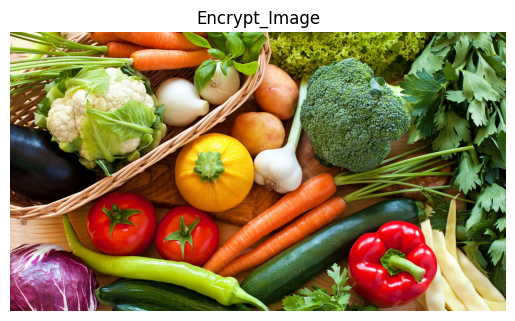

In [ ]:
plt.imshow(cv2.cvtColor(x,cv2.COLOR_BGR2RGB))
plt.title("Encrypt_Image")
plt.axis('off')
plt.show()

In [ ]:
n,m,z=0,0,0
kl=0
decrypt=""
for i in range(l):
  val=x_enc[n,m,z]
  orig_char=c[val^d[key[kl]]]
  decrypt=decrypt+orig_char
  print(f"Decrypting pixel({n},{m},{z}): {val} XOR {d[key[kl]]}={val ^ d[key[kl]]} ->'{orig_char}'")
  n=n+1
  m=m+1
  m=(m+1)%3
  z=(z+1)%3
  kl=(kl+1)%len(key)
print(decrypt)


Decrypting pixel(0,0,0): 66 XOR 49=115 ->'s'
Decrypting pixel(1,2,1): 87 XOR 50=101 ->'e'
Decrypting pixel(2,1,2): 80 XOR 51=99 ->'c'
Decrypting pixel(3,0,0): 67 XOR 49=114 ->'r'
Decrypting pixel(4,2,1): 87 XOR 50=101 ->'e'
Decrypting pixel(5,1,2): 71 XOR 51=116 ->'t'
secret
